In [1]:
import numpy as np
import tensorflow as tf
import gym

from infrastructure.buffer import ReplayBuffer, PrioritizedBuffer
from utils.util import build_network, build_duel_network, cartpole_plot
from agents.dqn_agent import DQNAgent, DoubleDQNAgent,  DeulDQNAgent, PrioritizedDQNAgent
from learners.dqn_learner import DQNLearner, PrioritizedDQNLearner

In [2]:
env = gym.make('CartPole-v0')
env.reset()

## GPU configuration
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

n_states = env.observation_space.shape[0]
n_actions = env.action_space.n

Start pre-sampling with random policy...
Pre-sampling finished!

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Episode: 0, Episode Length: 9, Mean Reward: 1.0, Total Reward: 9.0


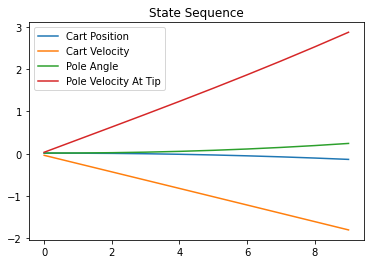

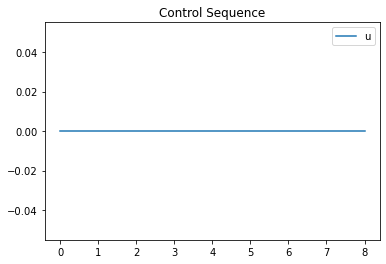

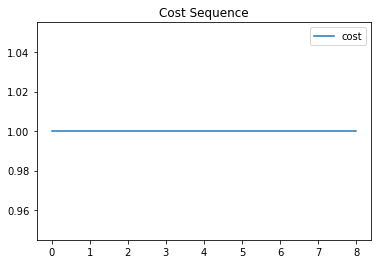

Episode: 10, Episode Length: 9, Mean Reward: 1.0, Total Reward: 9.0


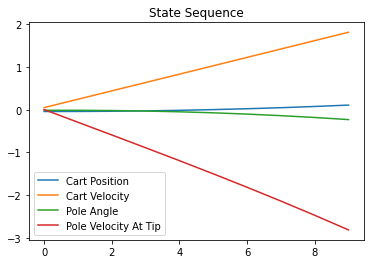

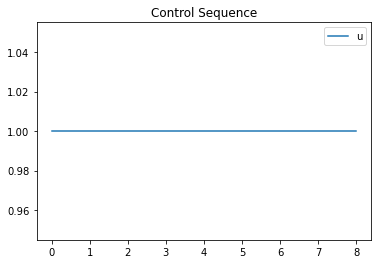

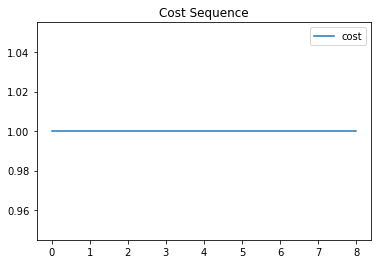

Episode: 20, Episode Length: 10, Mean Reward: 1.0, Total Reward: 10.0


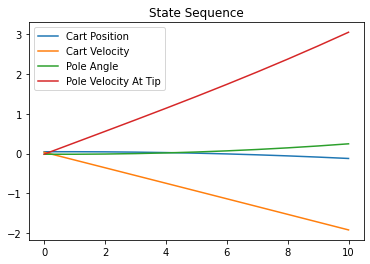

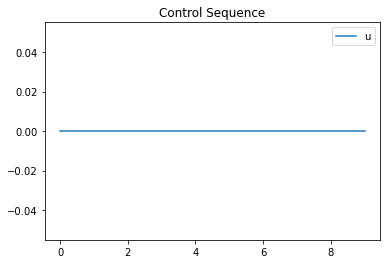

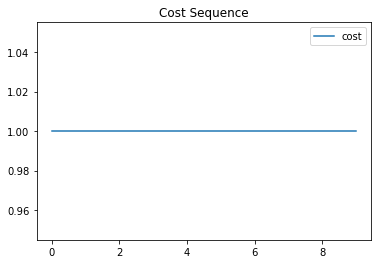

Episode: 30, Episode Length: 9, Mean Reward: 1.0, Total Reward: 9.0


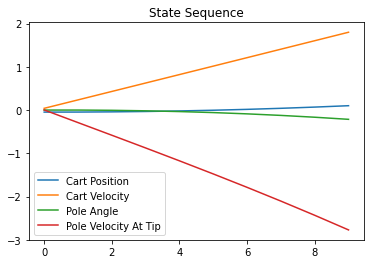

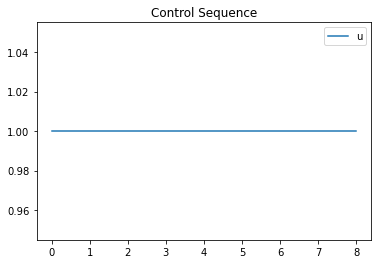

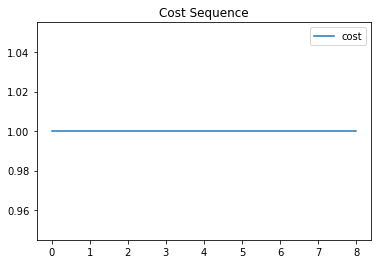

Episode: 40, Episode Length: 9, Mean Reward: 1.0, Total Reward: 9.0


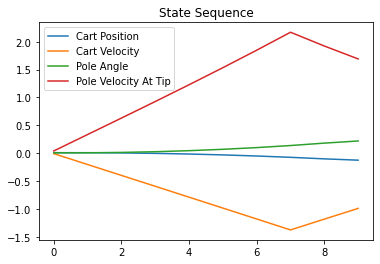

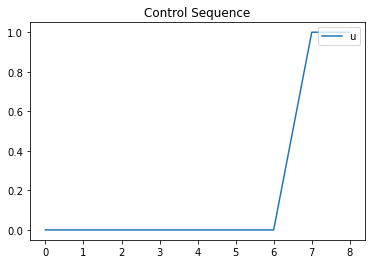

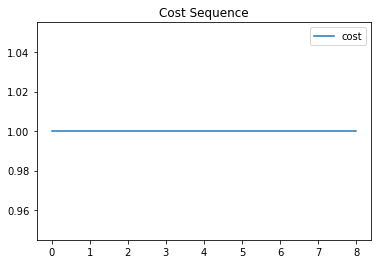

Episode: 50, Episode Length: 9, Mean Reward: 1.0, Total Reward: 9.0


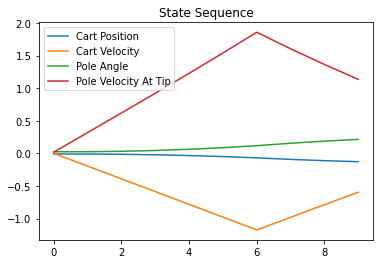

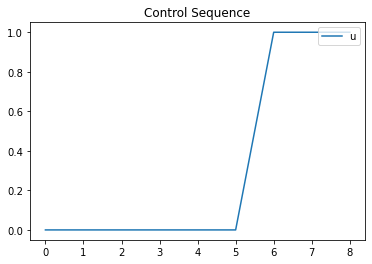

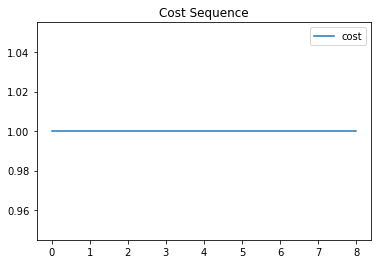

Episode: 60, Episode Length: 42, Mean Reward: 1.0, Total Reward: 42.0


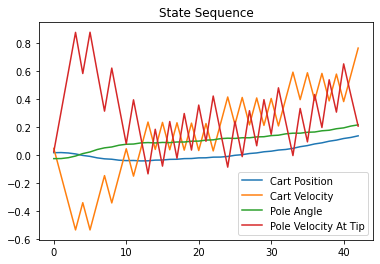

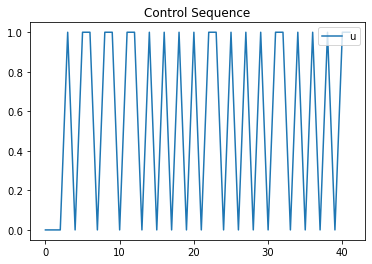

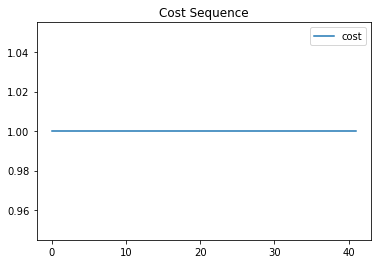

Episode: 70, Episode Length: 134, Mean Reward: 1.0, Total Reward: 134.0


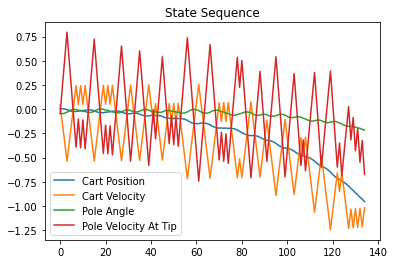

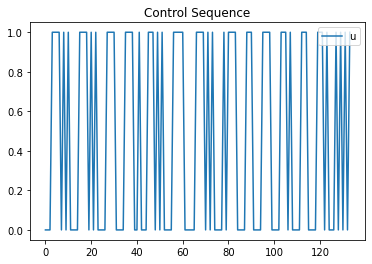

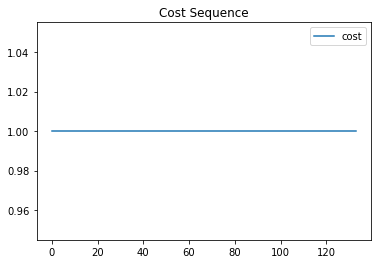

Episode: 80, Episode Length: 187, Mean Reward: 1.0, Total Reward: 187.0


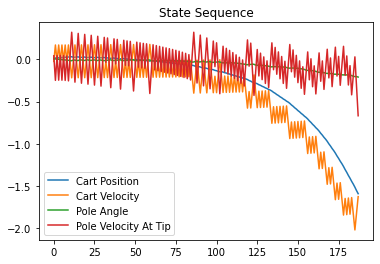

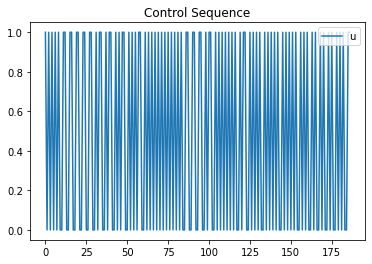

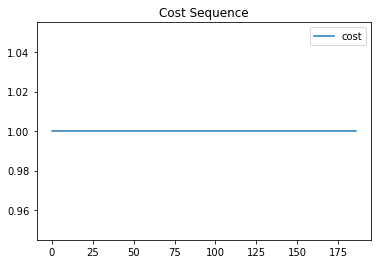

Episode: 90, Episode Length: 200, Mean Reward: 1.0, Total Reward: 200.0


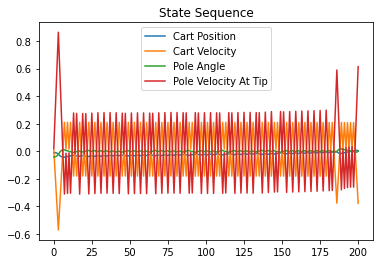

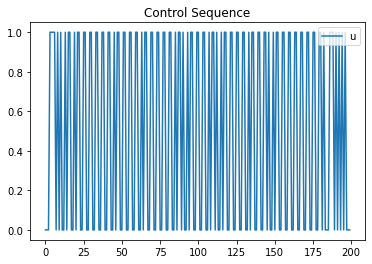

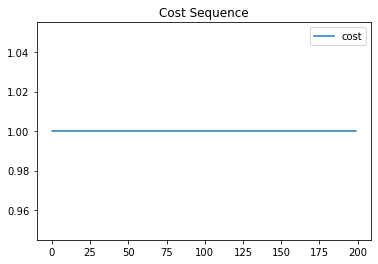

Episode: 100, Episode Length: 107, Mean Reward: 1.0, Total Reward: 107.0


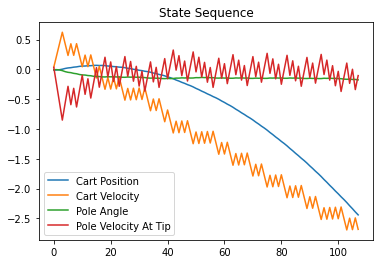

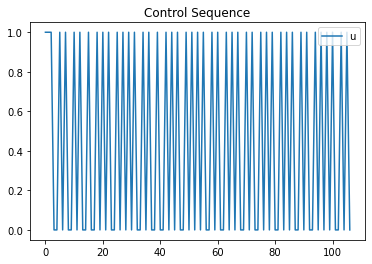

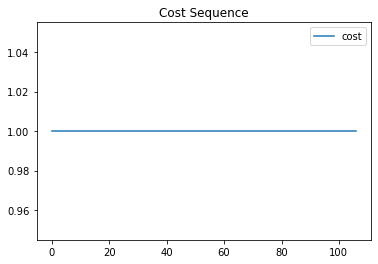

Episode: 110, Episode Length: 108, Mean Reward: 1.0, Total Reward: 108.0


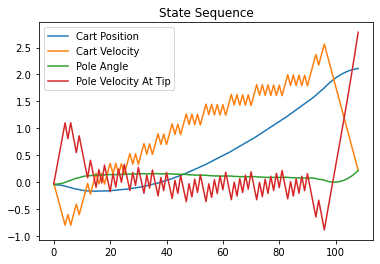

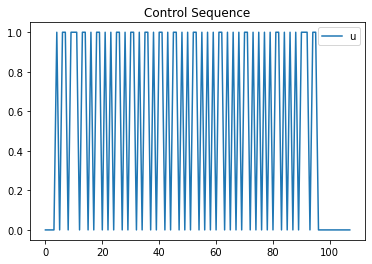

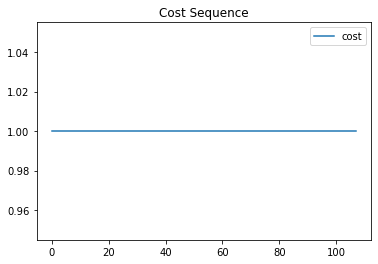

Episode: 120, Episode Length: 96, Mean Reward: 1.0, Total Reward: 96.0


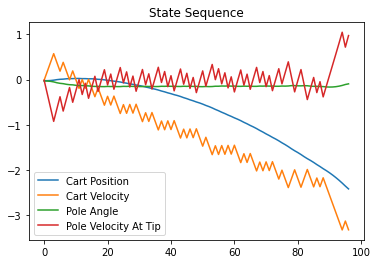

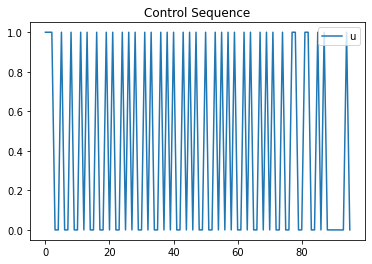

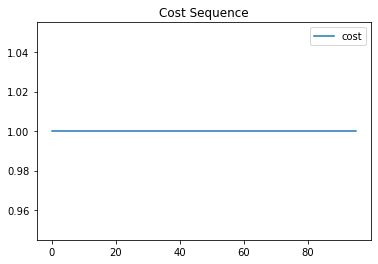

Episode: 130, Episode Length: 125, Mean Reward: 1.0, Total Reward: 125.0


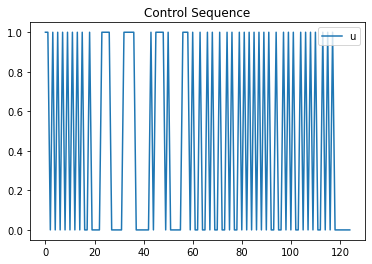

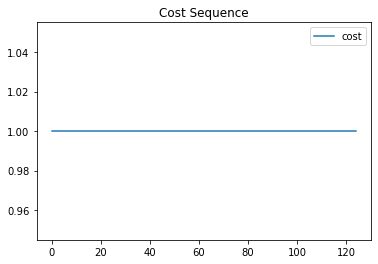

Episode: 140, Episode Length: 162, Mean Reward: 1.0, Total Reward: 162.0


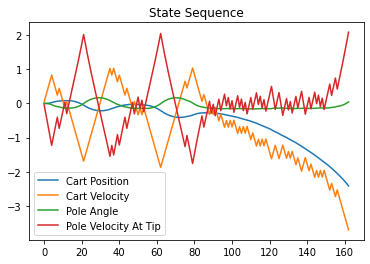

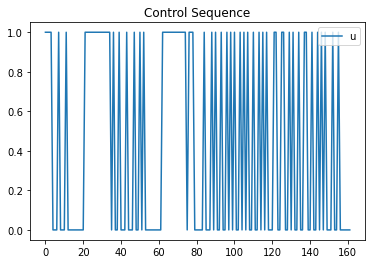

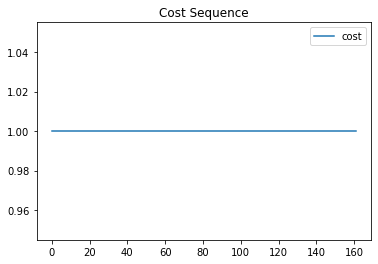

Episode: 150, Episode Length: 95, Mean Reward: 1.0, Total Reward: 95.0


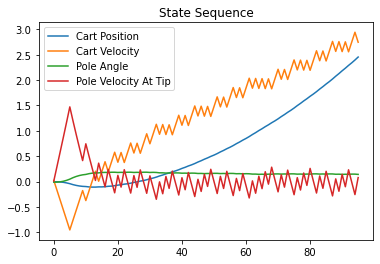

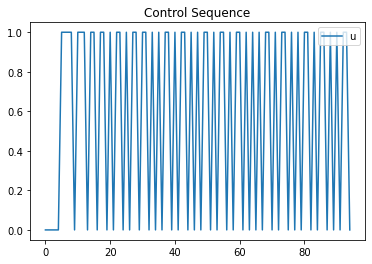

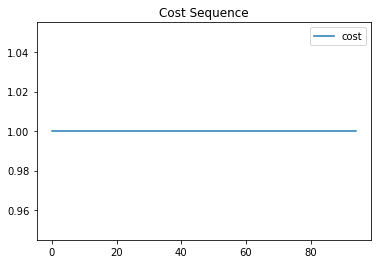

Episode: 160, Episode Length: 92, Mean Reward: 1.0, Total Reward: 92.0


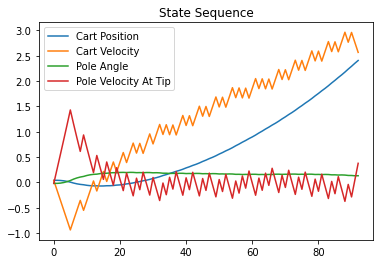

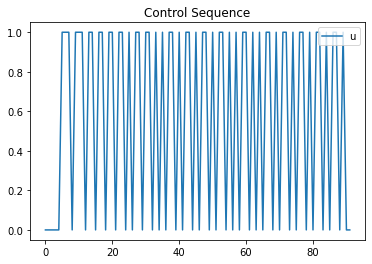

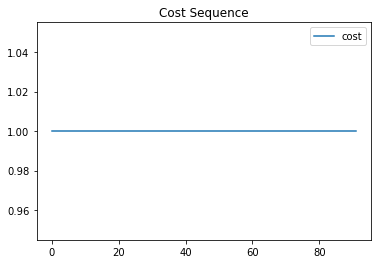

Episode: 170, Episode Length: 101, Mean Reward: 1.0, Total Reward: 101.0


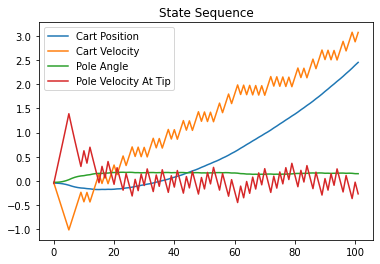

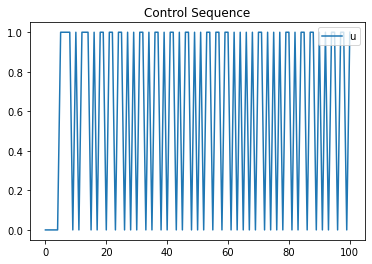

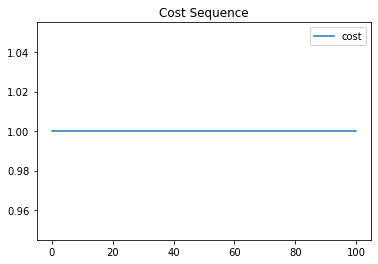

Episode: 180, Episode Length: 95, Mean Reward: 1.0, Total Reward: 95.0


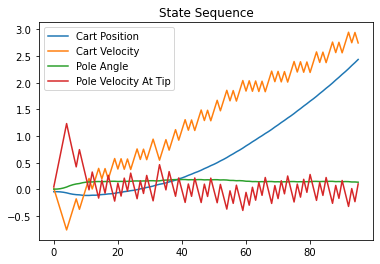

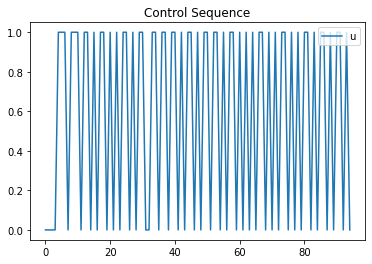

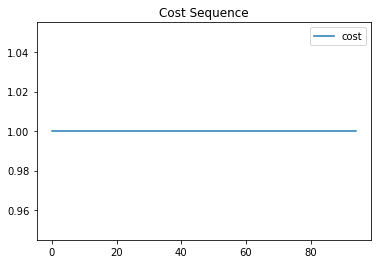

Episode: 190, Episode Length: 107, Mean Reward: 1.0, Total Reward: 107.0


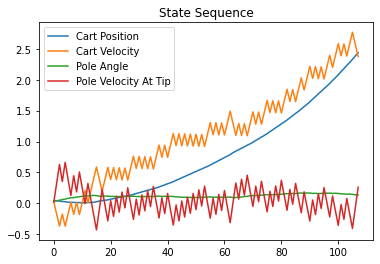

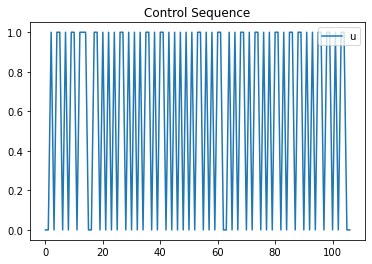

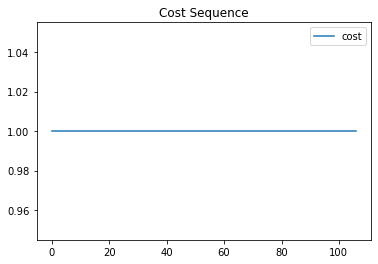

Training finished!


In [3]:
buffer = ReplayBuffer(10**4)
q_network = build_network(n_states, n_actions, 2, 200)

agent = DQNAgent(q_network, 0.99, 1e-3)
learner = DQNLearner(env, buffer, agent)

hist = learner.train(presample=10, batch_size=128, episodes=200, episode_length=200, interval=10, C=10, plot=cartpole_plot)

Start pre-sampling with random policy...
Pre-sampling finished!

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Episode: 0, Episode Length: 27, Mean Reward: 1.0, Total Reward: 27.0


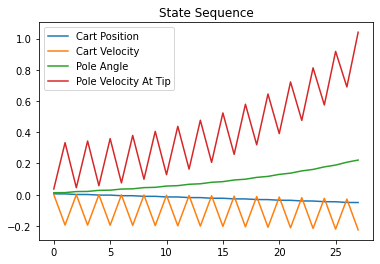

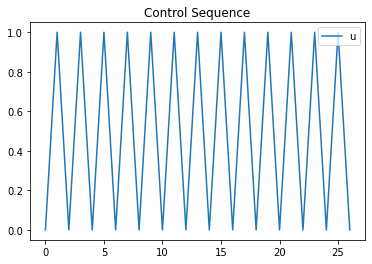

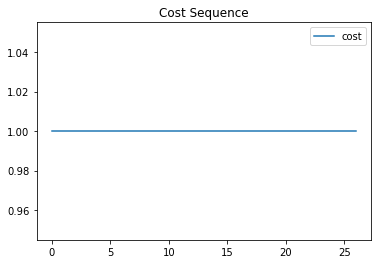

Episode: 10, Episode Length: 9, Mean Reward: 1.0, Total Reward: 9.0


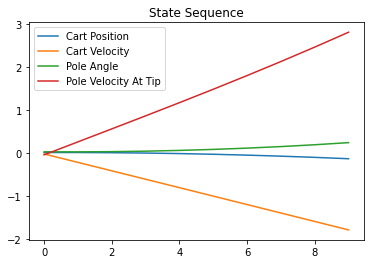

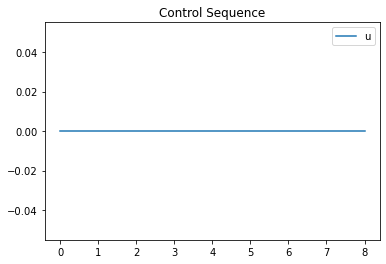

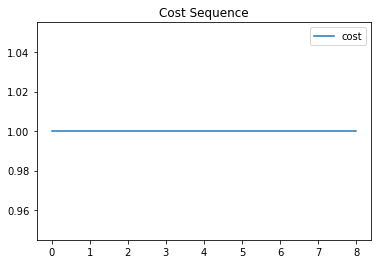

Episode: 20, Episode Length: 9, Mean Reward: 1.0, Total Reward: 9.0


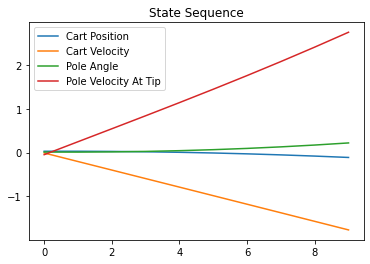

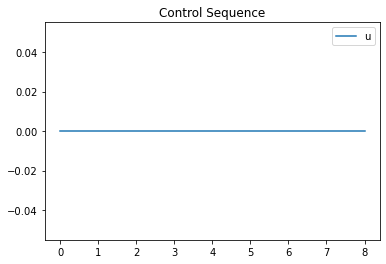

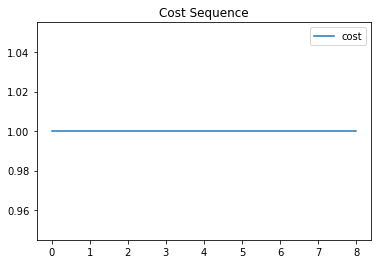

Episode: 30, Episode Length: 9, Mean Reward: 1.0, Total Reward: 9.0


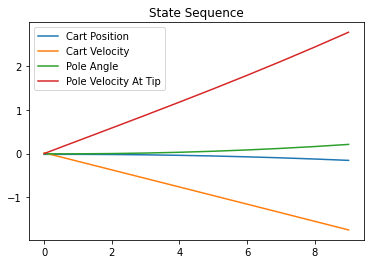

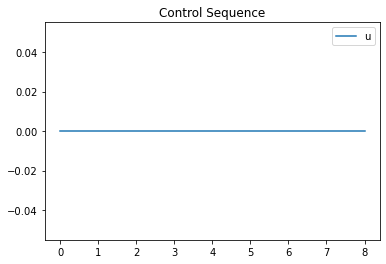

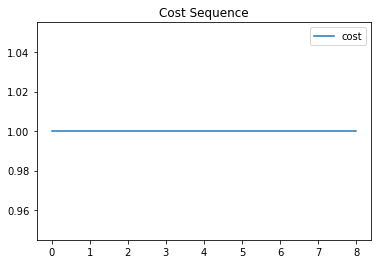

Episode: 40, Episode Length: 9, Mean Reward: 1.0, Total Reward: 9.0


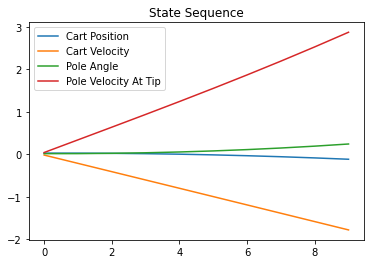

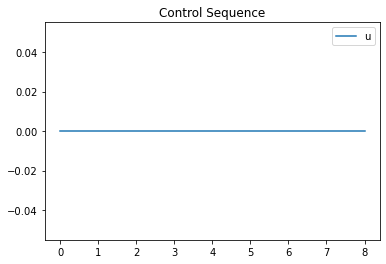

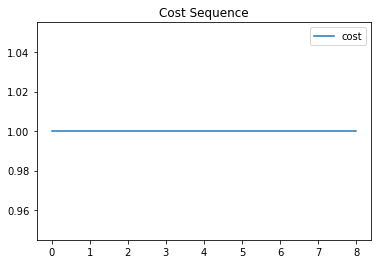

Episode: 50, Episode Length: 9, Mean Reward: 1.0, Total Reward: 9.0


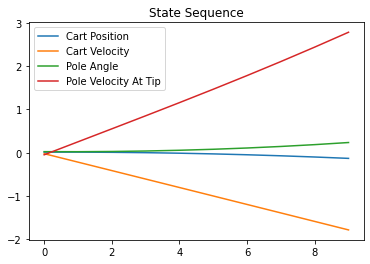

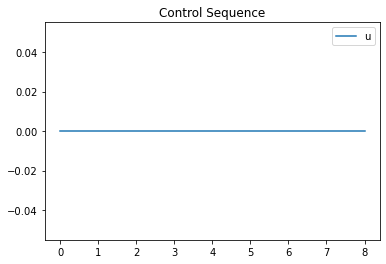

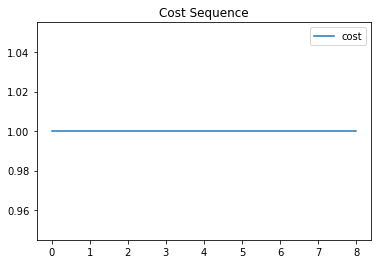

Episode: 60, Episode Length: 113, Mean Reward: 1.0, Total Reward: 113.0


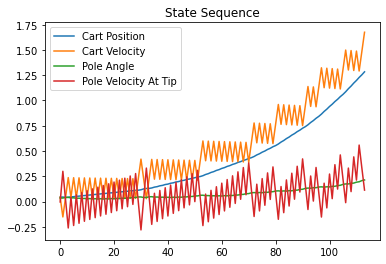

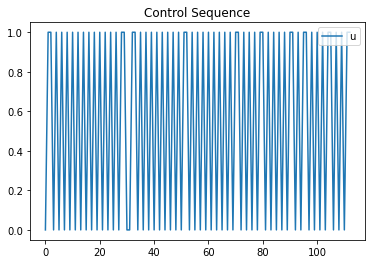

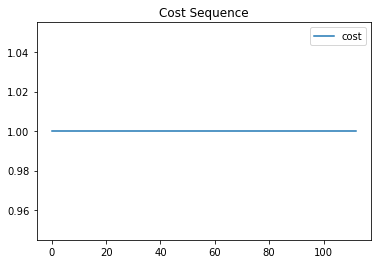

Episode: 70, Episode Length: 195, Mean Reward: 1.0, Total Reward: 195.0


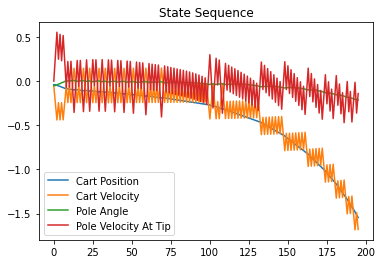

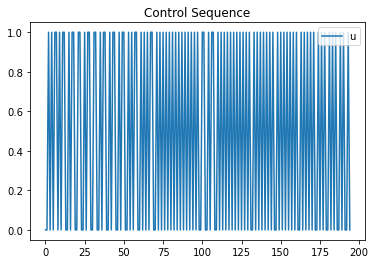

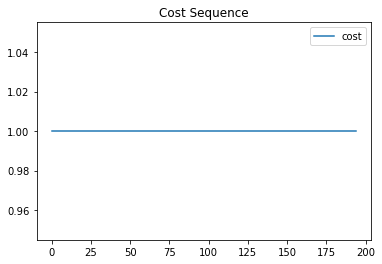

Episode: 80, Episode Length: 200, Mean Reward: 1.0, Total Reward: 200.0


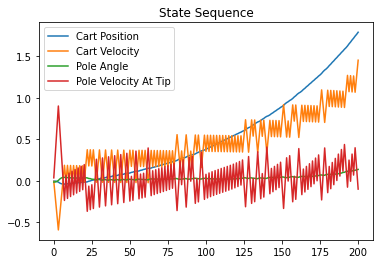

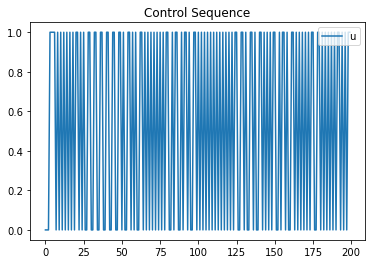

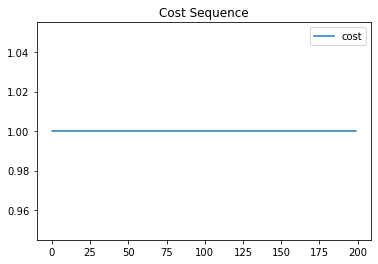

Episode: 90, Episode Length: 122, Mean Reward: 1.0, Total Reward: 122.0


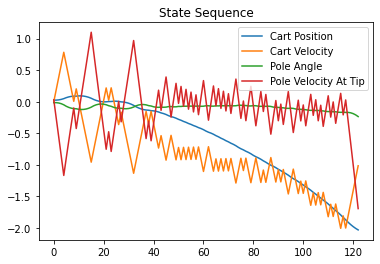

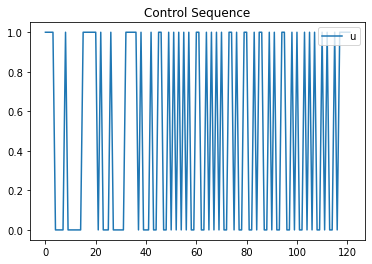

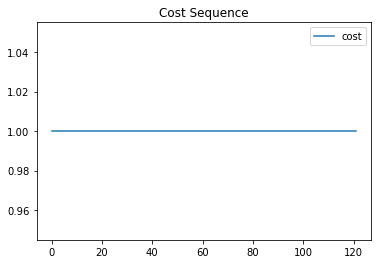

Episode: 100, Episode Length: 159, Mean Reward: 1.0, Total Reward: 159.0


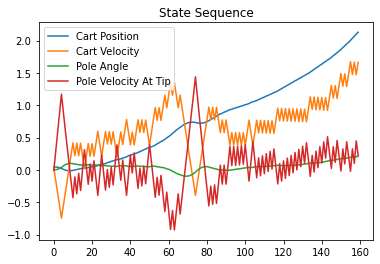

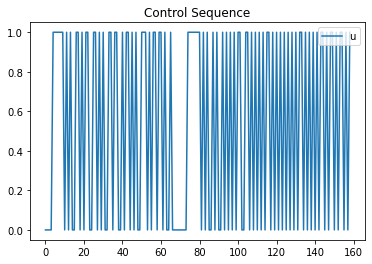

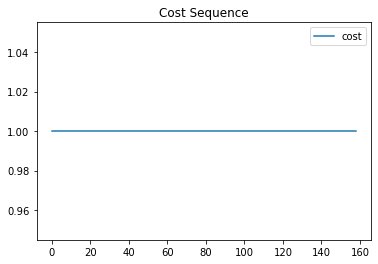

Episode: 110, Episode Length: 112, Mean Reward: 1.0, Total Reward: 112.0


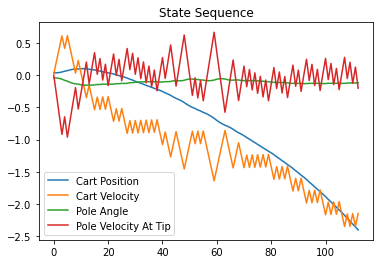

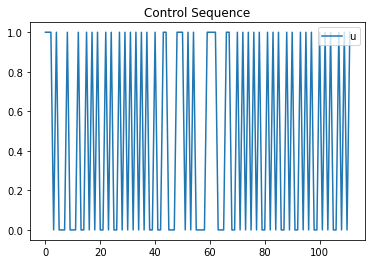

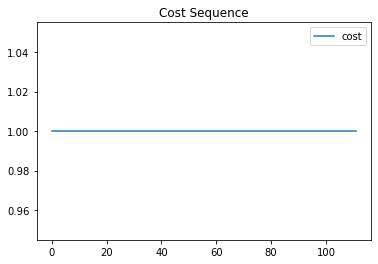

Episode: 120, Episode Length: 97, Mean Reward: 1.0, Total Reward: 97.0


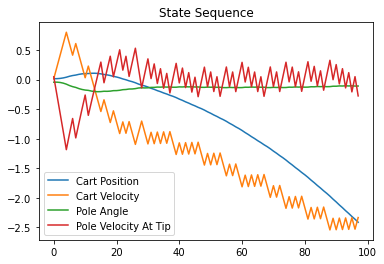

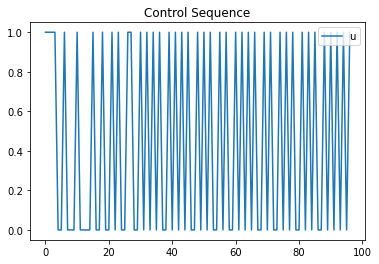

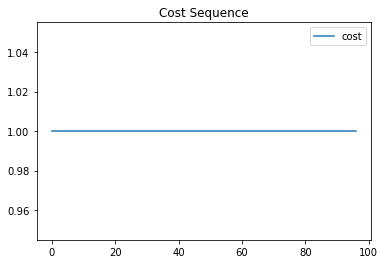

Episode: 130, Episode Length: 110, Mean Reward: 1.0, Total Reward: 110.0


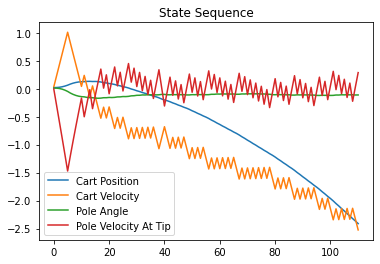

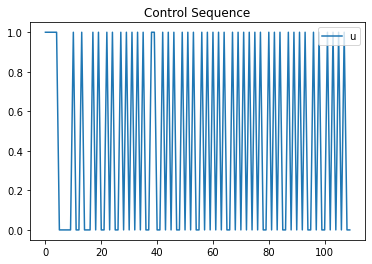

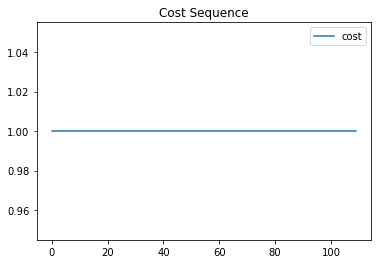

Episode: 140, Episode Length: 123, Mean Reward: 1.0, Total Reward: 123.0


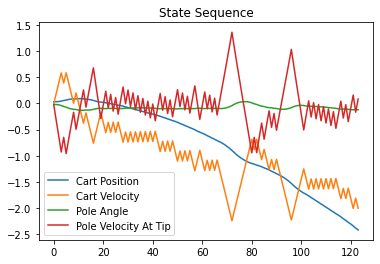

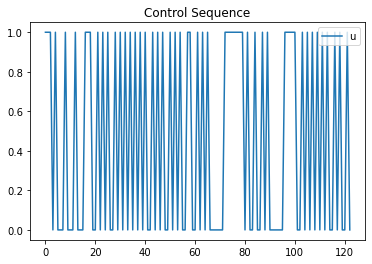

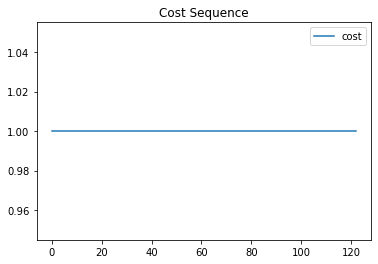

Episode: 150, Episode Length: 122, Mean Reward: 1.0, Total Reward: 122.0


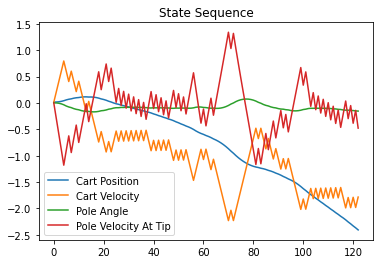

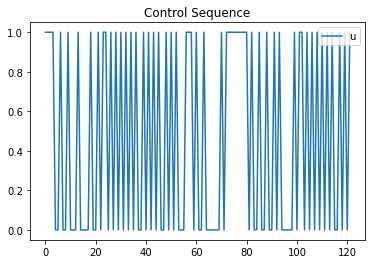

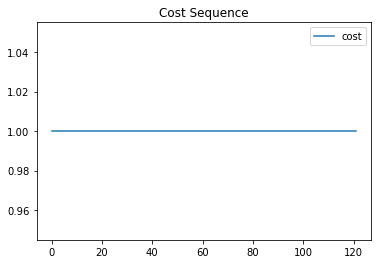

Episode: 160, Episode Length: 148, Mean Reward: 1.0, Total Reward: 148.0


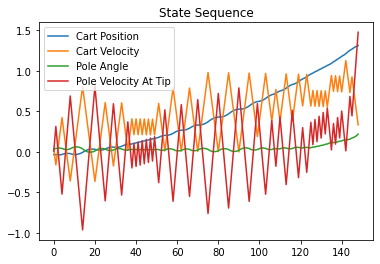

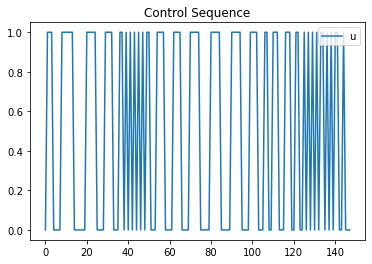

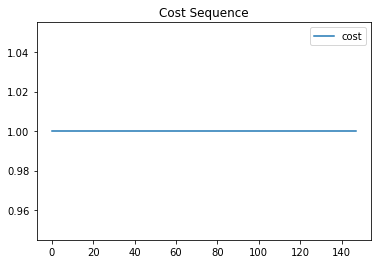

Episode: 170, Episode Length: 148, Mean Reward: 1.0, Total Reward: 148.0


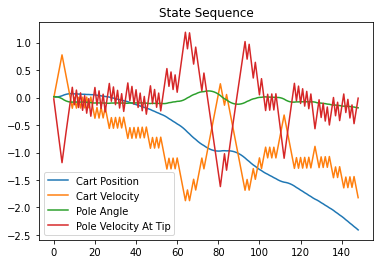

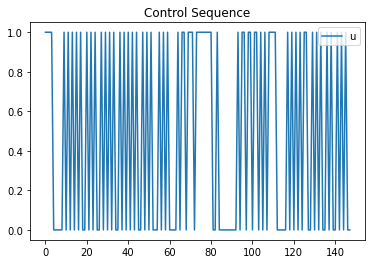

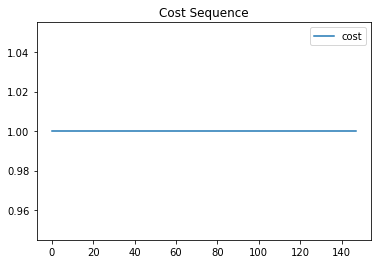

Episode: 180, Episode Length: 150, Mean Reward: 1.0, Total Reward: 150.0


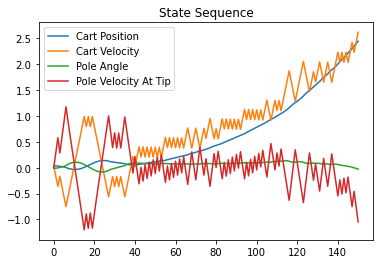

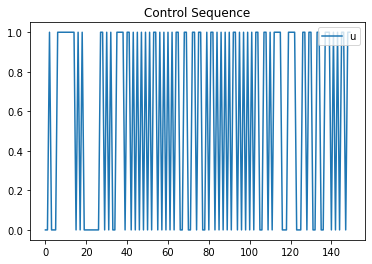

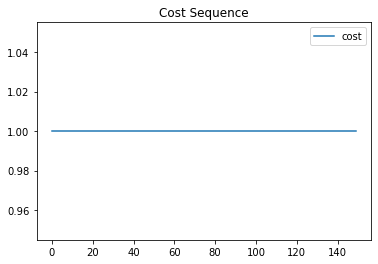

Episode: 190, Episode Length: 123, Mean Reward: 1.0, Total Reward: 123.0


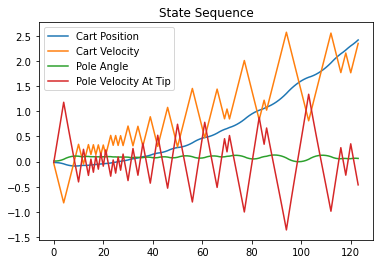

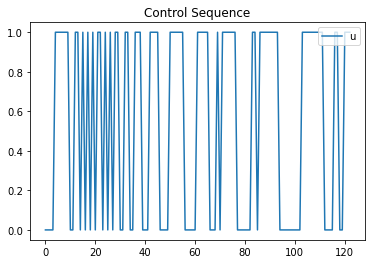

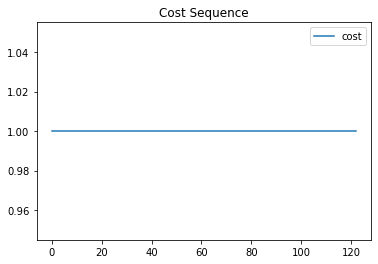

Training finished!


In [4]:
buffer = ReplayBuffer(10**4)
q_network = build_network(n_states, n_actions, 2, 200)

agent = DoubleDQNAgent(q_network, 0.99, 1e-3)
learner = DQNLearner(env, buffer, agent)

hist = learner.train(presample=10, batch_size=128, episodes=200, episode_length=200, interval=10, C=10,  plot=cartpole_plot)

Start pre-sampling with random policy...
Pre-sampling finished!

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Episode: 0, Episode Length: 9, Mean Reward: 1.0, Total Reward: 9.0


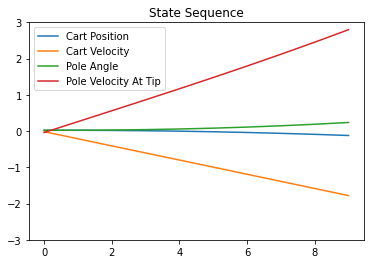

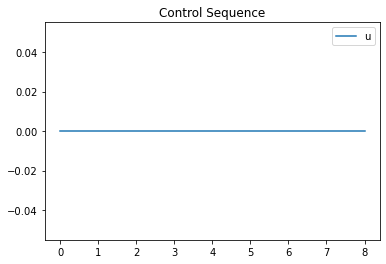

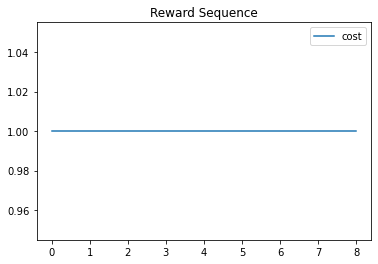

Episode: 10, Episode Length: 10, Mean Reward: 1.0, Total Reward: 10.0


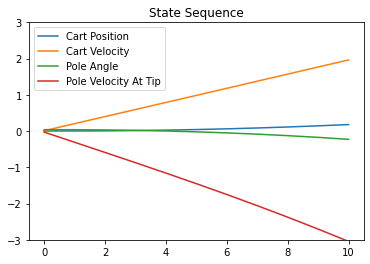

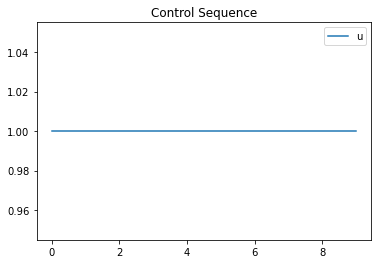

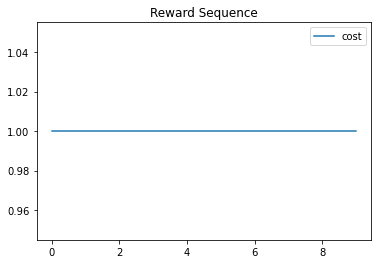

Episode: 20, Episode Length: 23, Mean Reward: 1.0, Total Reward: 23.0


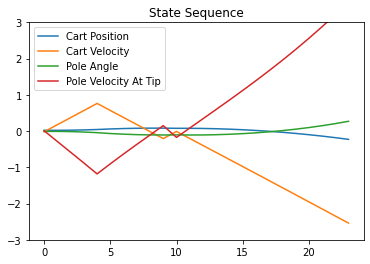

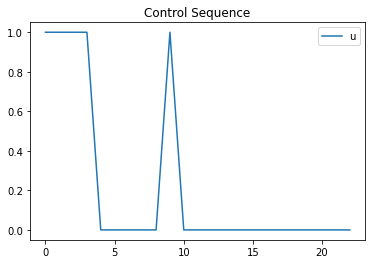

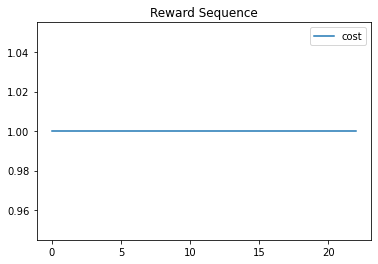

Episode: 30, Episode Length: 59, Mean Reward: 1.0, Total Reward: 59.0


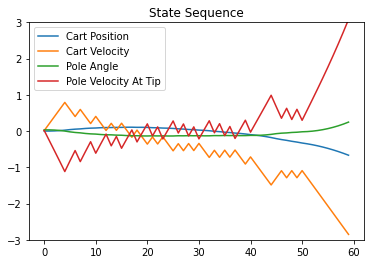

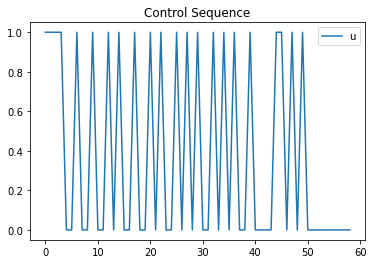

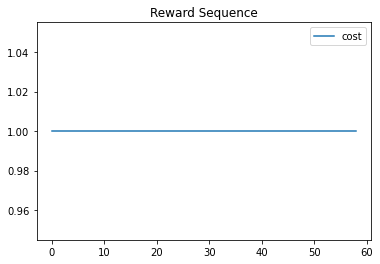

Episode: 40, Episode Length: 86, Mean Reward: 1.0, Total Reward: 86.0


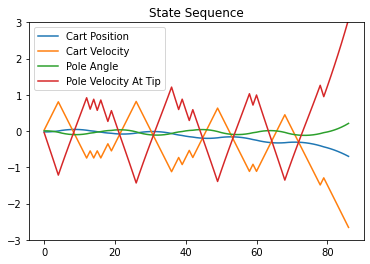

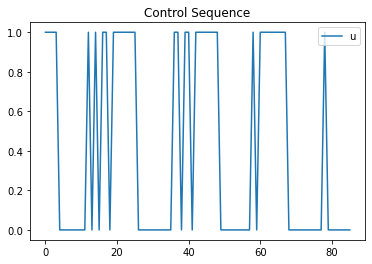

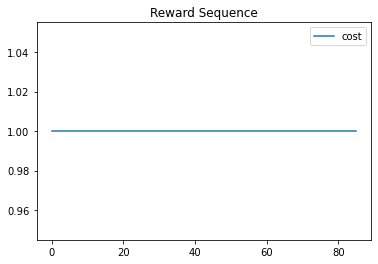

Episode: 50, Episode Length: 119, Mean Reward: 1.0, Total Reward: 119.0


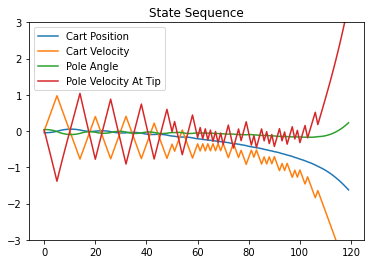

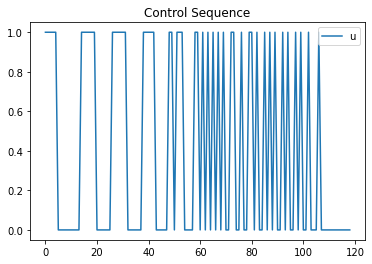

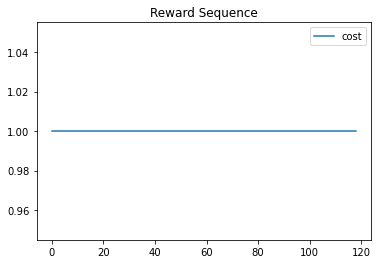

Episode: 60, Episode Length: 200, Mean Reward: 1.0, Total Reward: 200.0


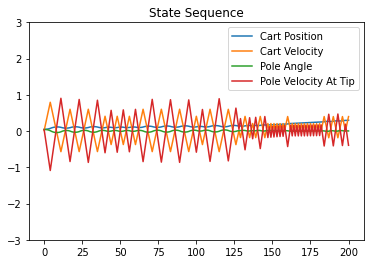

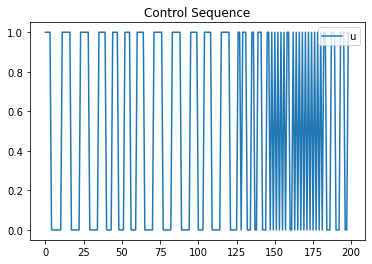

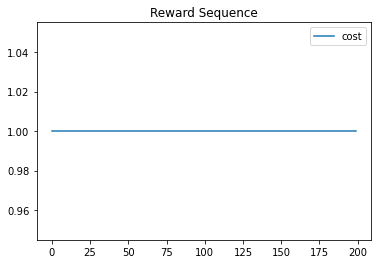

Episode: 70, Episode Length: 155, Mean Reward: 1.0, Total Reward: 155.0


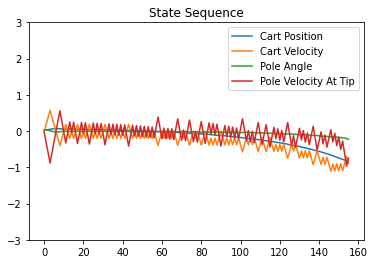

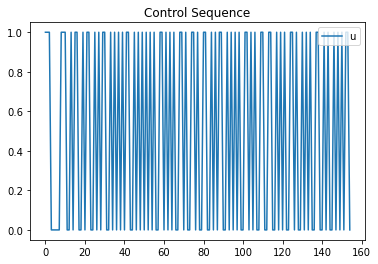

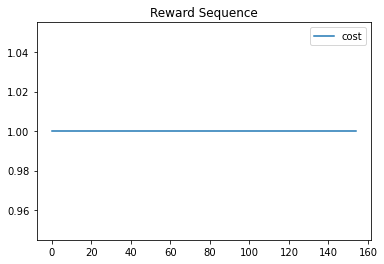

Episode: 80, Episode Length: 200, Mean Reward: 1.0, Total Reward: 200.0


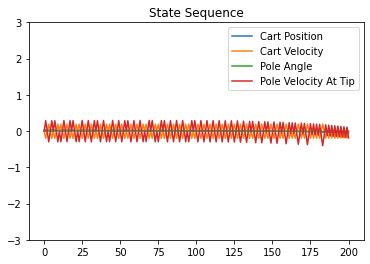

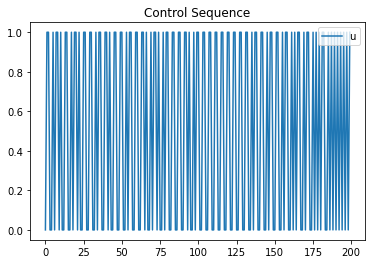

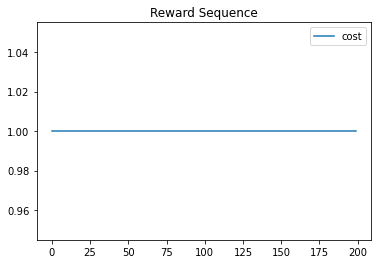

Episode: 90, Episode Length: 154, Mean Reward: 1.0, Total Reward: 154.0


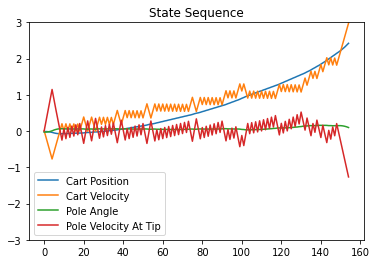

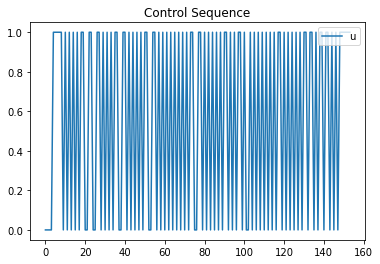

Episode: 100, Episode Length: 76, Mean Reward: 1.0, Total Reward: 76.0


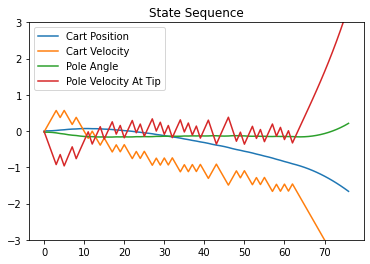

Episode: 110, Episode Length: 114, Mean Reward: 1.0, Total Reward: 114.0


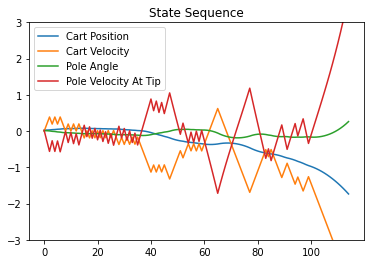

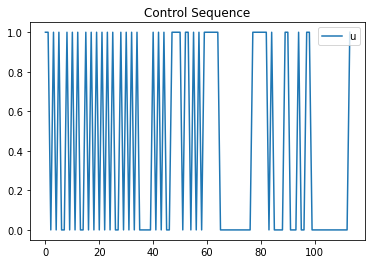

Episode: 120, Episode Length: 116, Mean Reward: 1.0, Total Reward: 116.0


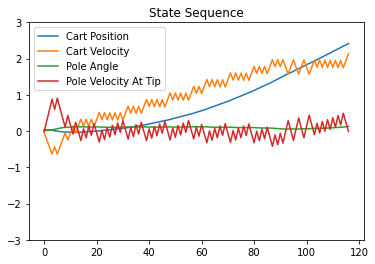

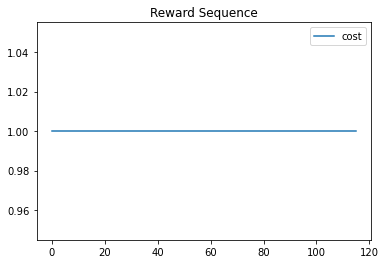

Episode: 130, Episode Length: 73, Mean Reward: 1.0, Total Reward: 73.0


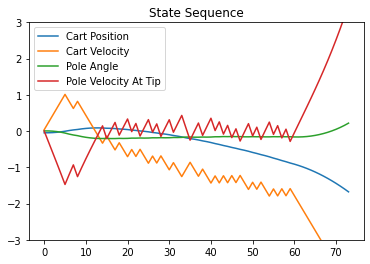

Episode: 140, Episode Length: 115, Mean Reward: 1.0, Total Reward: 115.0


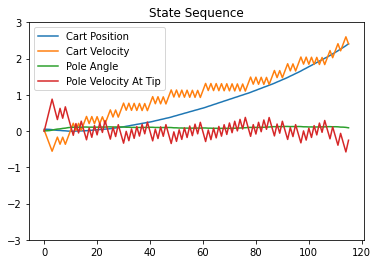

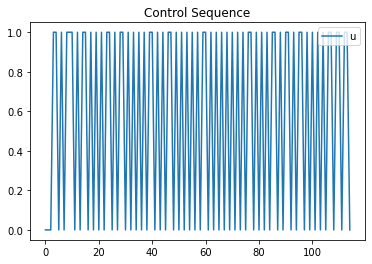

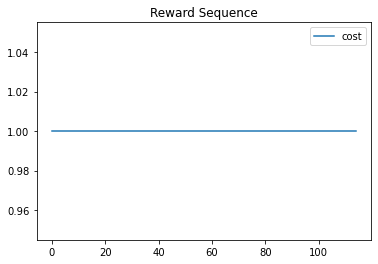

Episode: 150, Episode Length: 200, Mean Reward: 1.0, Total Reward: 200.0


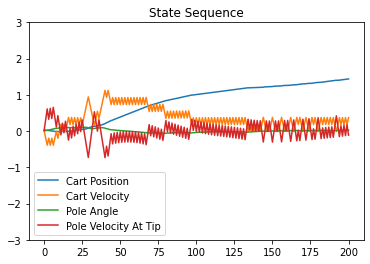

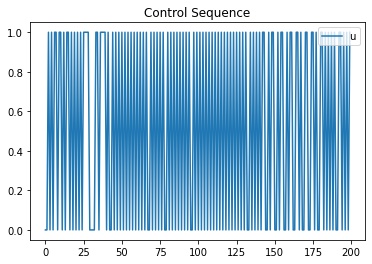

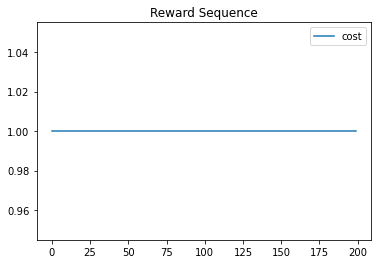

Episode: 160, Episode Length: 200, Mean Reward: 1.0, Total Reward: 200.0


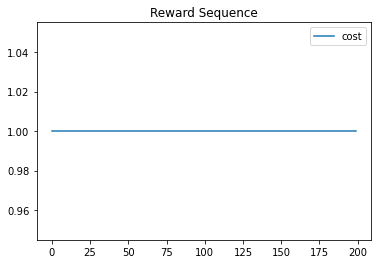

Episode: 170, Episode Length: 158, Mean Reward: 1.0, Total Reward: 158.0


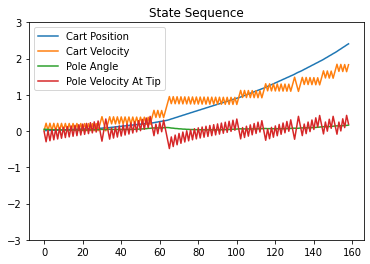

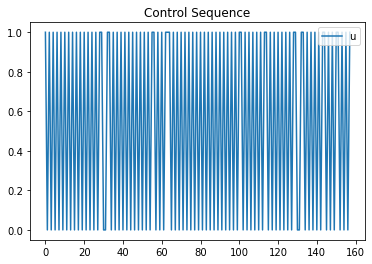

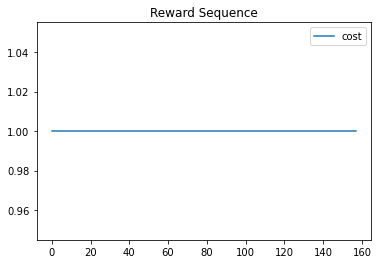

Episode: 180, Episode Length: 200, Mean Reward: 1.0, Total Reward: 200.0


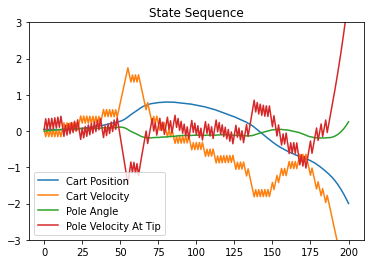

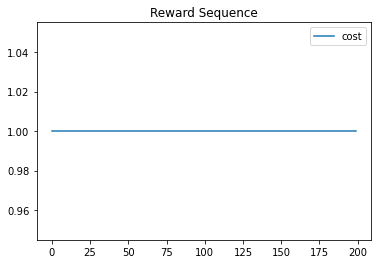

Episode: 190, Episode Length: 32, Mean Reward: 1.0, Total Reward: 32.0


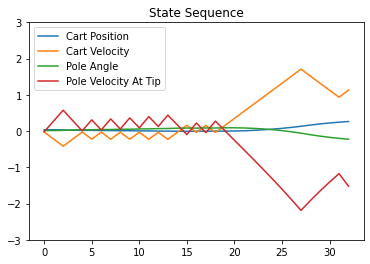

Training finished!


In [3]:
buffer = ReplayBuffer(10**4)
q_network = build_duel_network(n_states, n_actions, 2, 200)

agent = DeulDQNAgent(q_network, 0.99, 1e-3)
learner = DQNLearner(env, buffer, agent)

hist = learner.train(presample=10, batch_size=128, episodes=200, episode_length=200, interval=10, C=10, plot=cartpole_plot)

Start pre-sampling with random policy...
Pre-sampling finished!
Episode: 0, Episode Length: 10, Mean Reward: 1.0, Total Reward: 10.0


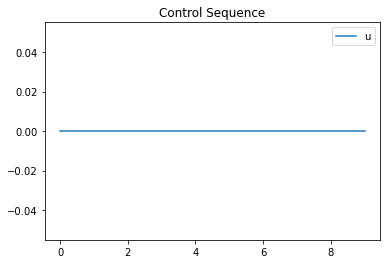

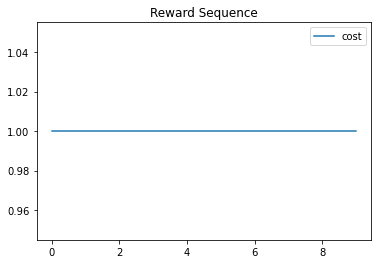


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Episode: 10, Episode Length: 10, Mean Reward: 1.0, Total Reward: 10.0


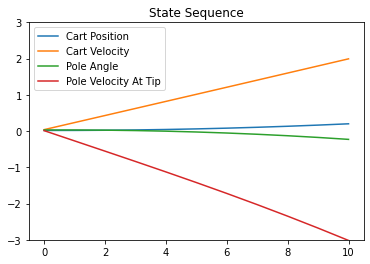

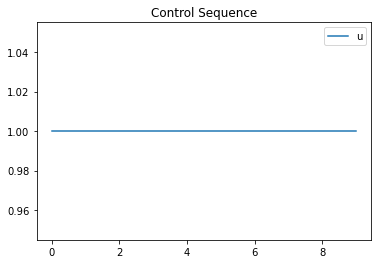

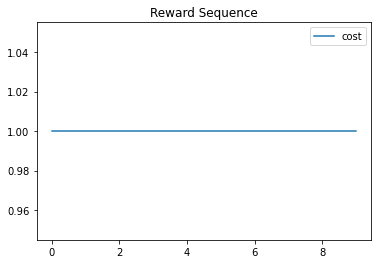

Episode: 20, Episode Length: 9, Mean Reward: 1.0, Total Reward: 9.0


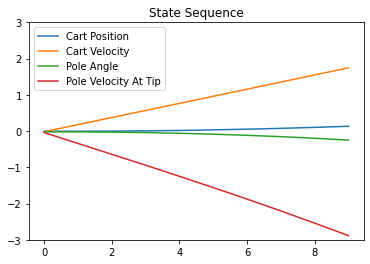

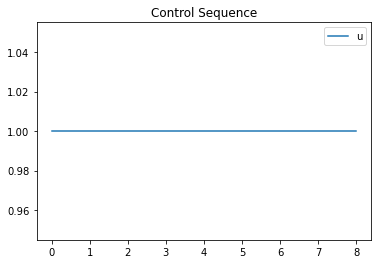

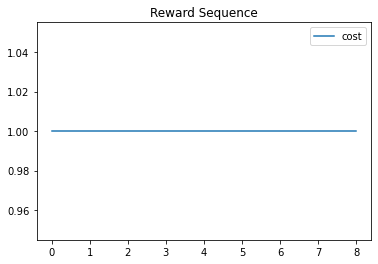

Episode: 30, Episode Length: 9, Mean Reward: 1.0, Total Reward: 9.0


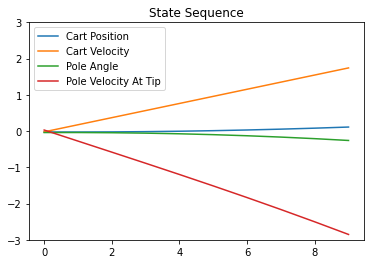

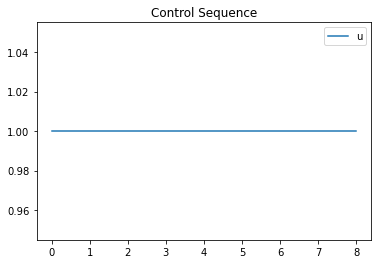

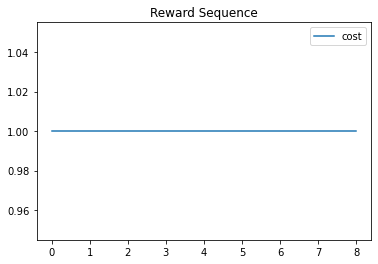

Episode: 40, Episode Length: 10, Mean Reward: 1.0, Total Reward: 10.0


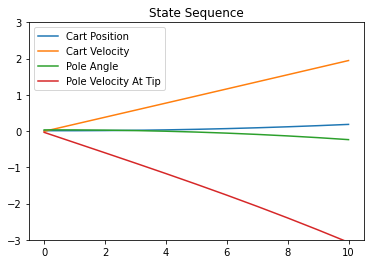

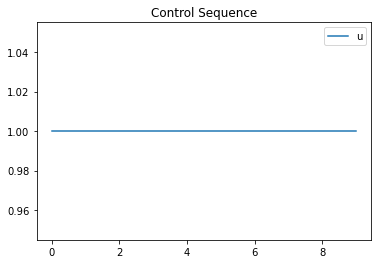

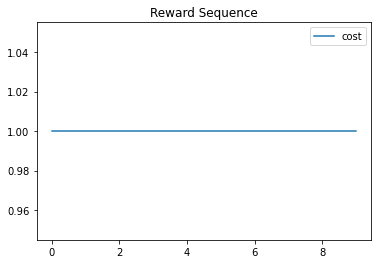

Episode: 50, Episode Length: 10, Mean Reward: 1.0, Total Reward: 10.0


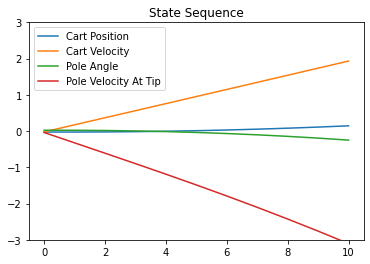

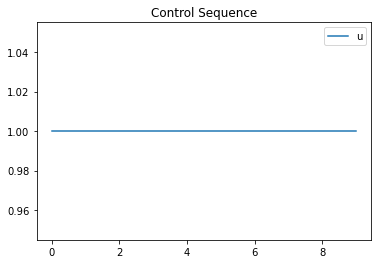

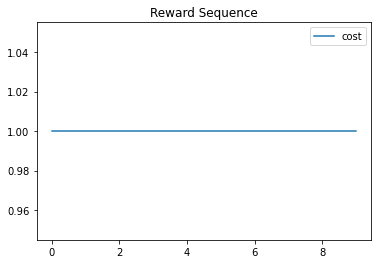

Episode: 60, Episode Length: 9, Mean Reward: 1.0, Total Reward: 9.0


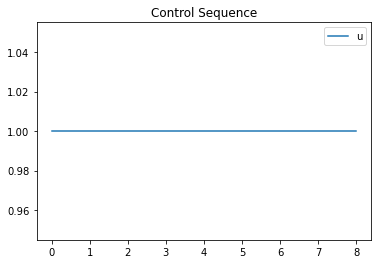

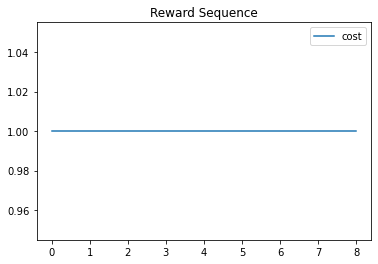

Episode: 70, Episode Length: 63, Mean Reward: 1.0, Total Reward: 63.0


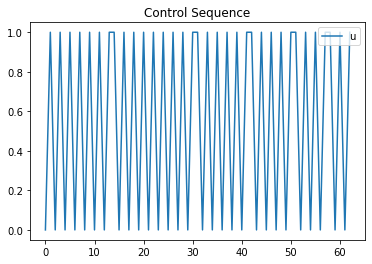

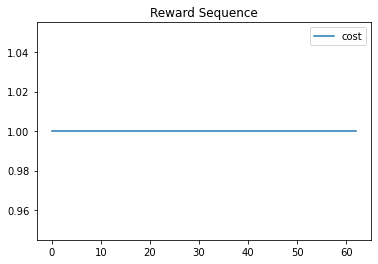

Episode: 80, Episode Length: 93, Mean Reward: 1.0, Total Reward: 93.0


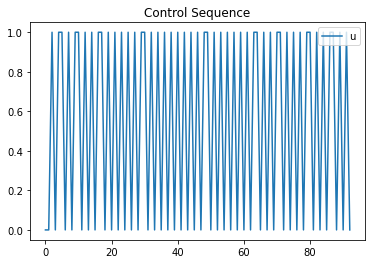

Episode: 90, Episode Length: 104, Mean Reward: 1.0, Total Reward: 104.0


Episode: 100, Episode Length: 200, Mean Reward: 1.0, Total Reward: 200.0


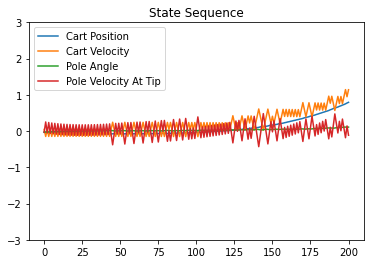

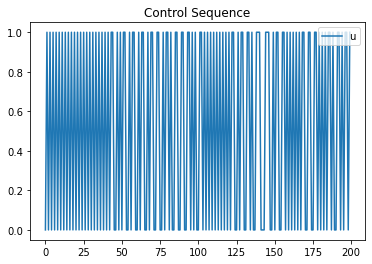

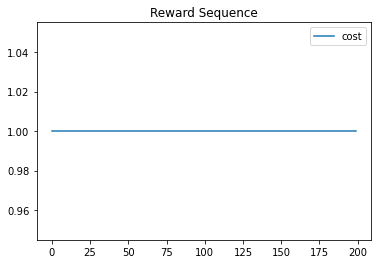

Episode: 110, Episode Length: 110, Mean Reward: 1.0, Total Reward: 110.0


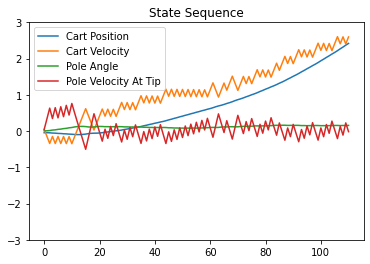

Episode: 120, Episode Length: 111, Mean Reward: 1.0, Total Reward: 111.0


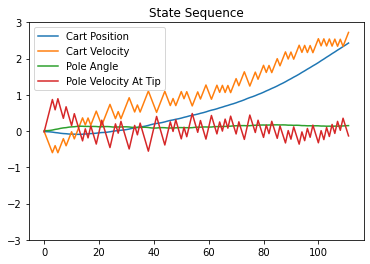

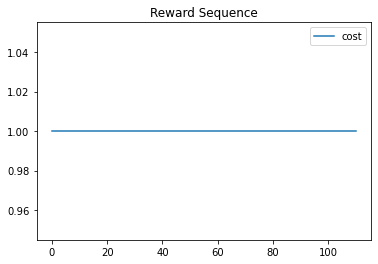

Episode: 130, Episode Length: 104, Mean Reward: 1.0, Total Reward: 104.0


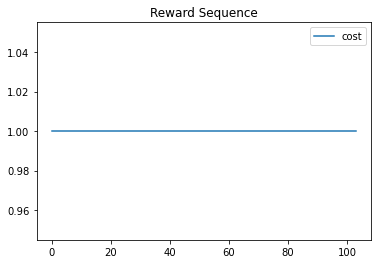

Episode: 140, Episode Length: 164, Mean Reward: 1.0, Total Reward: 164.0


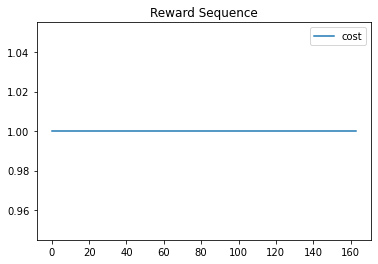

Episode: 150, Episode Length: 111, Mean Reward: 1.0, Total Reward: 111.0


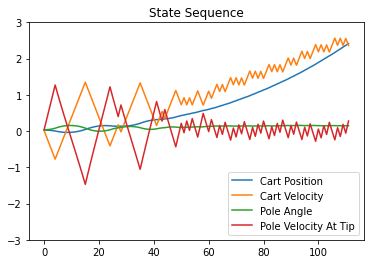

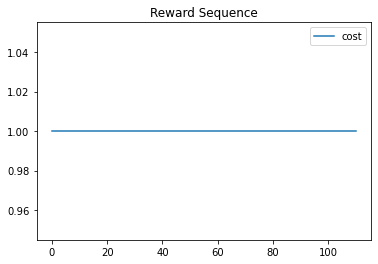

Episode: 160, Episode Length: 101, Mean Reward: 1.0, Total Reward: 101.0


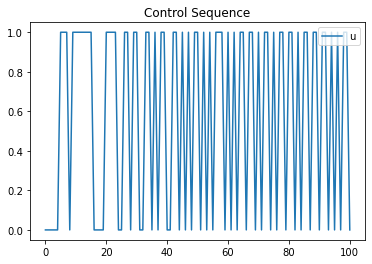

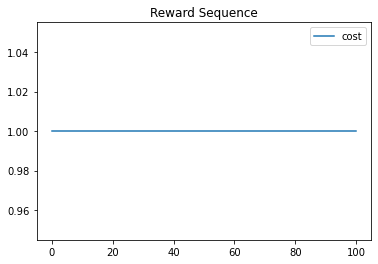

Episode: 170, Episode Length: 145, Mean Reward: 1.0, Total Reward: 145.0


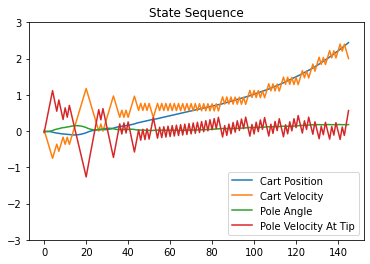

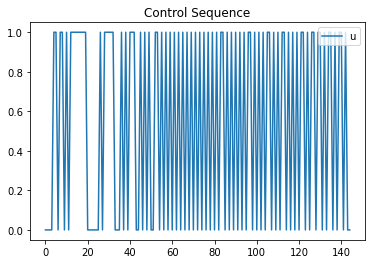

Episode: 180, Episode Length: 104, Mean Reward: 1.0, Total Reward: 104.0


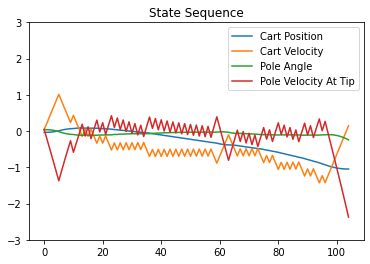

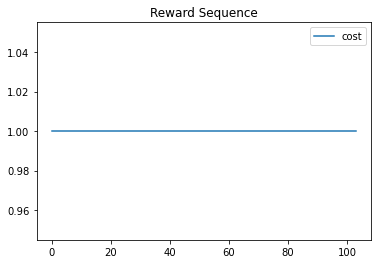

Episode: 190, Episode Length: 100, Mean Reward: 1.0, Total Reward: 100.0


Training finished!


In [4]:
buffer = PrioritizedBuffer(10**4)
q_network = build_network(n_states, n_actions, 2, 200)

agent = PrioritizedDQNAgent(q_network, 0.99, 1e-3)
learner = PrioritizedDQNLearner(env, buffer, agent)

hist = learner.train(presample=10, batch_size=128, episodes=200, episode_length=200, interval=10, C=10, plot=cartpole_plot)

In [3]:
buffer = PrioritizedBuffer(10**4)
q_network = build_network(n_states, n_actions, 2, 200)

agent = PrioritizedDQNAgent(q_network, 0.99, 1e-3)
learner = PrioritizedDQNLearner(env, buffer, agent)

In [4]:
print("Start pre-sampling with random policy...")
random_policy = lambda x: env.action_space.sample()
for t in range(10):
    learner.sample_trail(random_policy, 128, 200, add_to_buffer=True)
        
print("Pre-sampling finished!")

Start pre-sampling with random policy...
Pre-sampling finished!


In [14]:
x = env.reset()

u = random_policy(x)
x_next, reward, terminal, _ = env.step(u)

In [20]:
buffer.push((x, u, reward, x_next, terminal), 0.1)

In [15]:
idxs, exps, ws = buffer.sample(10)
idxs

[16687, 17687, 19063, 10137, 11120, 11846, 12683, 13681, 14501, 15594]

In [16]:
ws

[1.0086658177166086,
 1.0272015493400641,
 1.2134184679327973,
 1.0162552813642285,
 1.0093262461651467,
 1.027527667694828,
 1.0093554929669586,
 1.0093457184197658,
 1.0118867432099803,
 1.0174676284880173]